In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

%matplotlib inline 

# 多项式回归

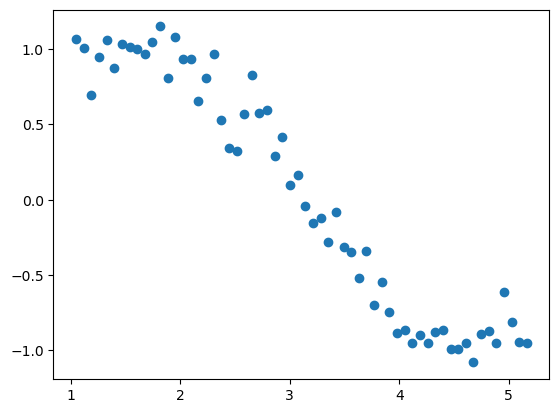

In [2]:
# 生成60对，具备一定随机性的数据集 Y = sin(x) + rand
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
data.head(10)
plt.scatter(data['x'],data['y'])

In [3]:
x

array([1.04719755, 1.11701072, 1.18682389, 1.25663706, 1.32645023,
       1.3962634 , 1.46607657, 1.53588974, 1.60570291, 1.67551608,
       1.74532925, 1.81514242, 1.88495559, 1.95476876, 2.02458193,
       2.0943951 , 2.16420827, 2.23402144, 2.30383461, 2.37364778,
       2.44346095, 2.51327412, 2.58308729, 2.65290046, 2.72271363,
       2.7925268 , 2.86233997, 2.93215314, 3.00196631, 3.07177948,
       3.14159265, 3.21140582, 3.28121899, 3.35103216, 3.42084533,
       3.4906585 , 3.56047167, 3.63028484, 3.70009801, 3.76991118,
       3.83972435, 3.90953752, 3.97935069, 4.04916386, 4.11897703,
       4.1887902 , 4.25860337, 4.32841654, 4.39822972, 4.46804289,
       4.53785606, 4.60766923, 4.6774824 , 4.74729557, 4.81710874,
       4.88692191, 4.95673508, 5.02654825, 5.09636142, 5.16617459])

In [4]:
x[1]**2

1.2477129514463583

In [5]:
# 生成多项式特征
for i in range(2,16):  
    colname = 'x_%d'%i    
    # x_2是x的平方；x_3是x的立方，以此类推
    data[colname] = data['x'] ** i

data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


使用RSS(残差平方和（Residual Sum of Squares))作为损失函数

In [6]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
        
    print(f"power = {power}--> {predictors}")
    
    #Fit the model
    linreg = LinearRegression()#normalize=True)
    linreg.fit(data[predictors],data['y'])
    # 使用fit后的模型预测得到预测值y_pred
    y_pred = linreg.predict(data[predictors])
    
    # 计算预测值y_pred和实际值y之间的RSS 残差平方和（Residual Sum of Squares）
    rss = sum((y_pred-data['y'])**2)
    # 创建了一个列表 ret，并将 RSS（残差平方和）作为第一个元素添加到列表中。
    ret = [rss]
    # 将线性回归模型的截距（intercept）添加到 ret 列表中
    ret.extend([linreg.intercept_])
    # 将线性回归模型的系数（coefficients）添加到 ret 列表中， linreg.coef_ 包含了每个特征的系数值。
    ret.extend(linreg.coef_)
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
#         print(f"power = {power}")
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        # 使用线plot y_pred 
        plt.plot(data['x'],y_pred,lw=3)
        # 使用点plot y 
        plt.plot(data['x'],data['y'],'.')
        
        plt.title('Plot for power: %d , RSS: %.2f'% (power,rss))
    else:
        print(f"power = {power} donot plot")
        pass
    
    return ret

power = 1--> ['x']
power = 2--> ['x', 'x_2']
power = 2 donot plot
power = 3--> ['x', 'x_2', 'x_3']


power = 4--> ['x', 'x_2', 'x_3', 'x_4']
power = 4 donot plot
power = 5--> ['x', 'x_2', 'x_3', 'x_4', 'x_5']
power = 5 donot plot
power = 6--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6']
power = 7--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7']


power = 7 donot plot
power = 8--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8']
power = 8 donot plot
power = 9--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9']


power = 10--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10']
power = 10 donot plot
power = 11--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11']
power = 11 donot plot
power = 12--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12']


power = 13--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13']
power = 13 donot plot
power = 14--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14']
power = 14 donot plot
power = 15--> ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15']


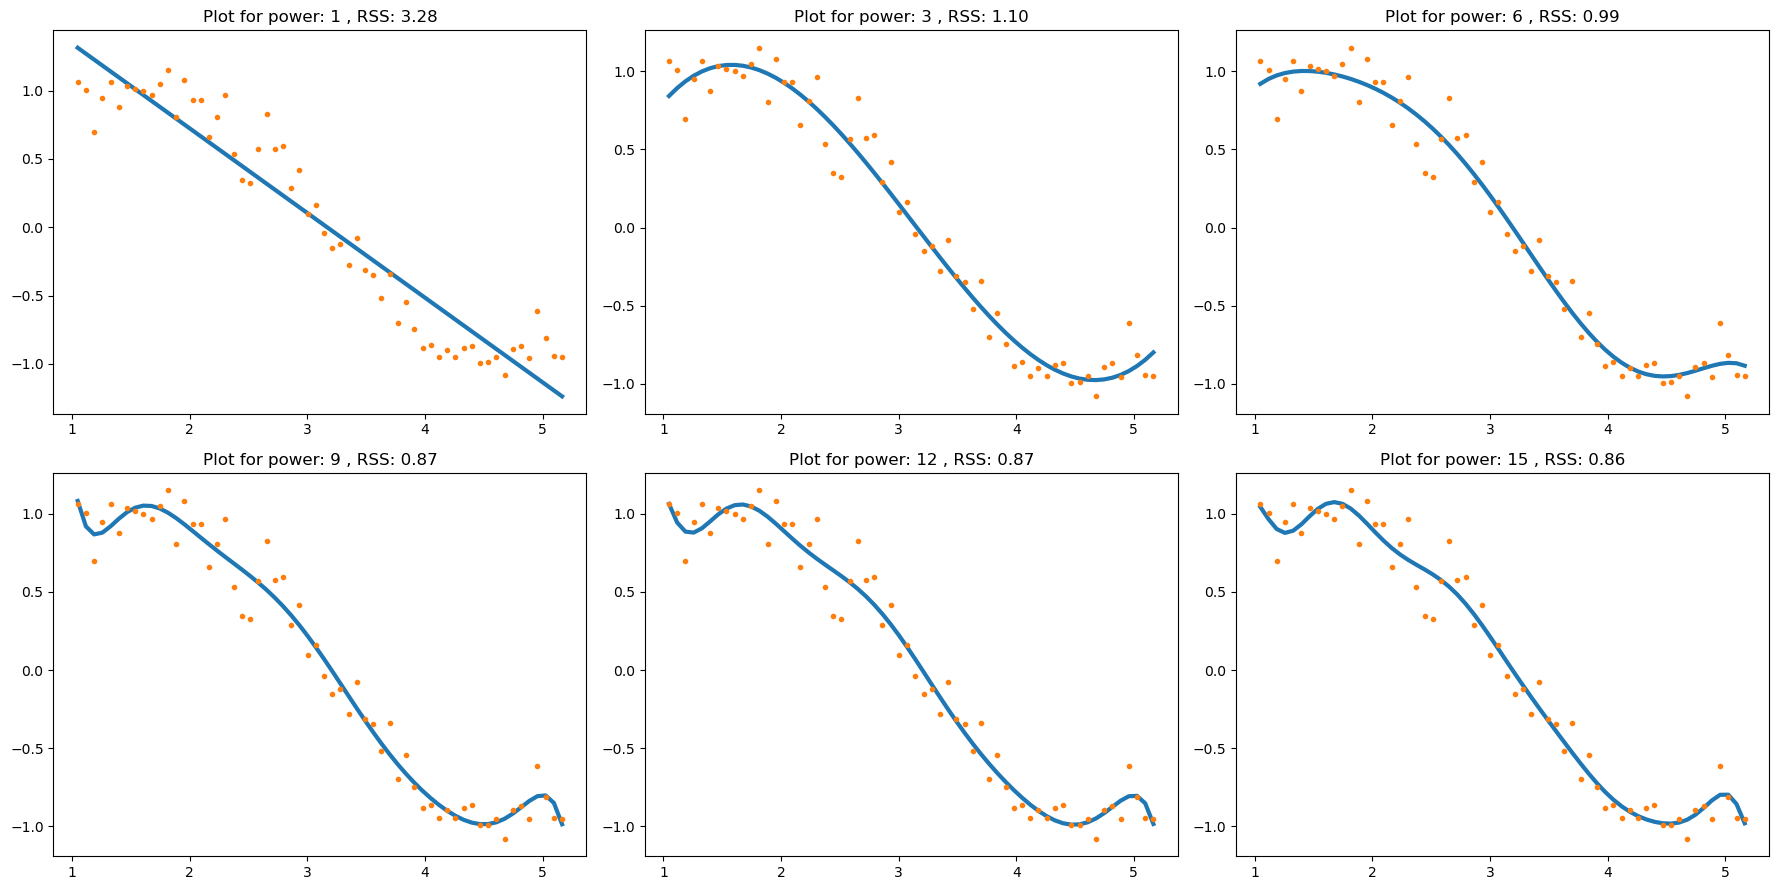

In [7]:
plt.rcParams['figure.figsize'] = 18,9

#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the power value and plot position for which a plot is required in a dict
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [8]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


## L2 Normalization Ridge Regression
- 岭回归是在线性回归的基础上引入L2正则化（Ridge Regression也叫L2正则化）的一种改进方法。
- 在目标函数中加入了一个惩罚项，该项是模型权重的平方和乘以一个正则化参数（alpha）。
- 这个正则化项有助于防止过拟合，尤其在特征之间存在共线性（高度相关）的情况下。


In [9]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    
    ridgereg = Ridge(alpha=alpha) #,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)


    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred,lw=3)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g ,RSS : %.2f'%(alpha,rss))
    return ret
        

/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.32656e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.14063e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.68903e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.74791e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.61813e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


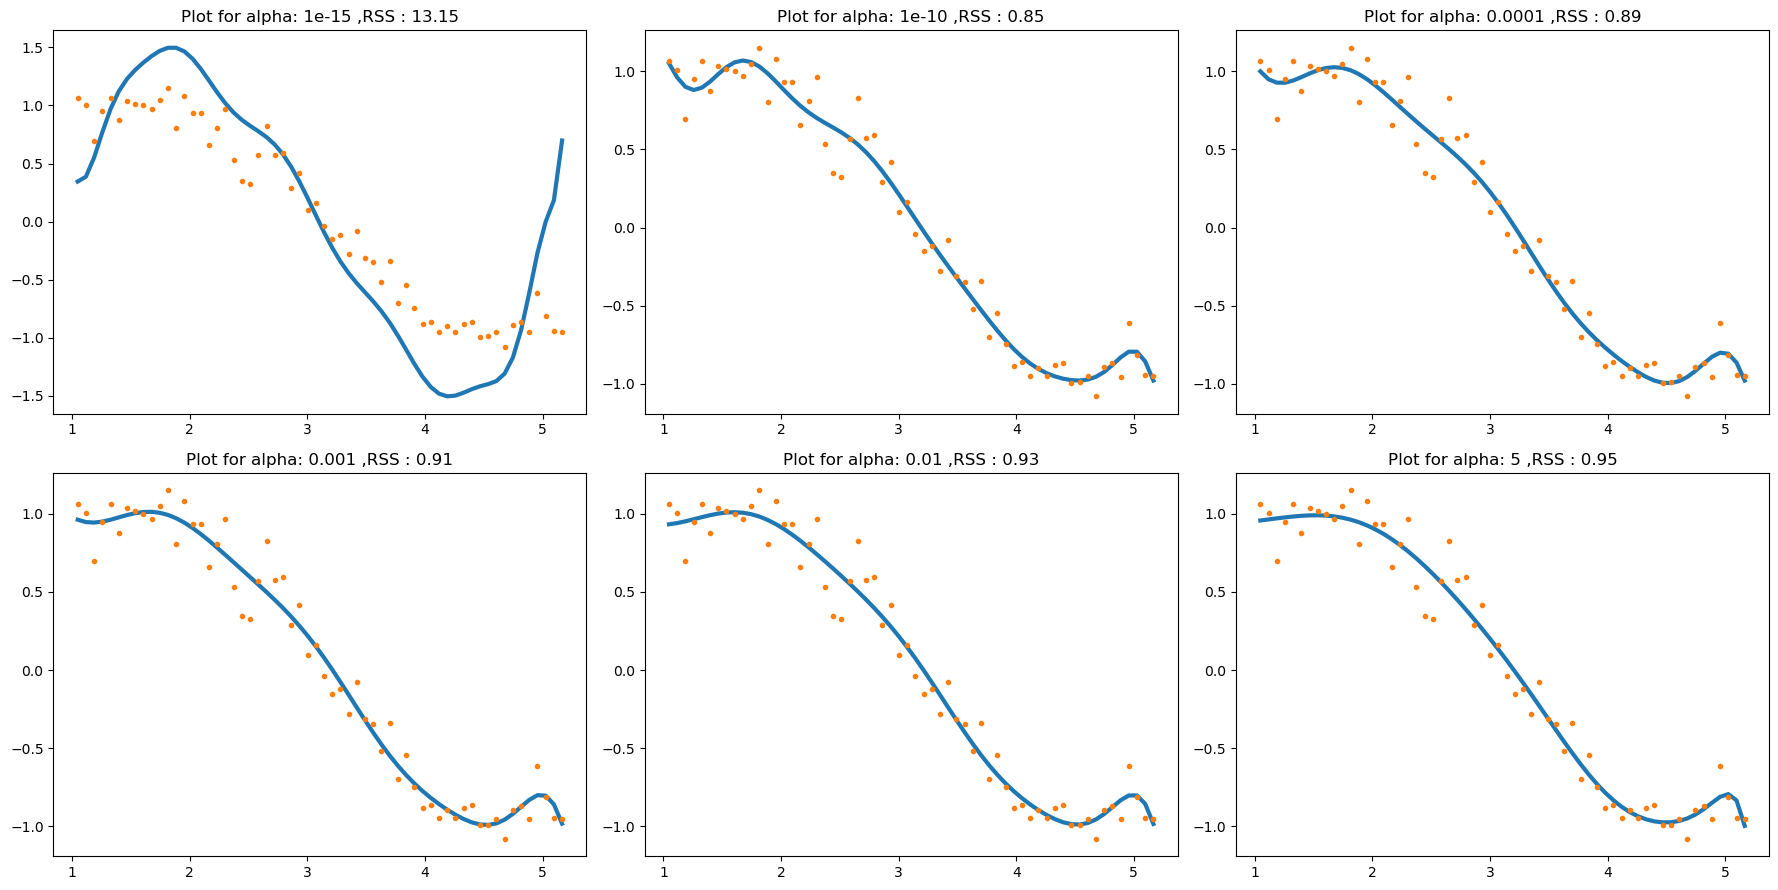

In [10]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [11]:
predictors

['x',
 'x_2',
 'x_3',
 'x_4',
 'x_5',
 'x_6',
 'x_7',
 'x_8',
 'x_9',
 'x_10',
 'x_11',
 'x_12',
 'x_13',
 'x_14',
 'x_15']

In [12]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,13,-2.8e+04,1.9e+05,-5.9e+05,1.1e+06,-1.4e+06,1.3e+06,-8.4e+05,4.2e+05,-1.6e+05,4.6e+04,-1e+04,1.6e+03,-1.9e+02,15,-0.71,0.016
alpha_1e-10,0.85,75,-6.5e+02,2e+03,-2.8e+03,1.1e+03,2e+03,-3.8e+03,3.3e+03,-1.8e+03,6.9e+02,-1.9e+02,36,-4.8,0.43,-0.023,0.00055
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_0.0001,0.89,6.3,-5.9,-3.3,2.2,4,0.019,-3.6,-0.14,3.4,-2.8,1.1,-0.28,0.044,-0.0042,0.00022,-5e-06
alpha_0.001,0.91,2.6,-1.6,-1.2,0.19,1.2,0.73,-0.73,-1.4,1.9,-1,0.26,-0.028,-0.0023,0.001,-0.00011,4.5e-06
alpha_0.01,0.93,1.2,-0.31,-0.28,-0.011,0.26,0.25,-0.064,-0.28,0.0022,0.29,-0.24,0.094,-0.022,0.0029,-0.00022,7.2e-06
alpha_1,0.94,0.87,0.0073,0.018,0.027,0.027,0.012,-0.01,-0.02,-0.0021,0.017,-0.0082,0.00097,0.00033,-0.00013,1.6e-05,-7.2e-07
alpha_5,0.95,0.92,0.0035,0.0082,0.012,0.014,0.0096,0.00011,-0.0086,-0.0073,0.0038,0.0054,-0.0051,0.0018,-0.00034,3.3e-05,-1.3e-06
alpha_10,0.95,0.93,0.0025,0.0059,0.0091,0.01,0.008,0.0013,-0.0062,-0.007,0.0018,0.0064,-0.0051,0.0018,-0.00032,3e-05,-1.2e-06
alpha_20,0.95,0.95,0.0017,0.0041,0.0064,0.0075,0.006,0.0013,-0.0044,-0.0056,0.00095,0.0053,-0.0041,0.0014,-0.00025,2.3e-05,-9.1e-07


### 有多少个系数为0

In [13]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

## L1 Regulariztion Lasso Regression
- Lasso回归（Least Absolute Shrinkage and Selection Operator Regression）也是在线性回归的基础上引入正则化的方法，但是使用的是L1正则化。
- L1正则化的惩罚项是模型权重的绝对值之和乘以一个正则化参数（alpha）。
- Lasso回归有助于产生稀疏权重，即使对于大量特征，只有一部分特征的权重会非零，这可以看作是一种特征选择的方法。
- L1正则化项是模型参数的绝对值之和乘以一个正则化参数。其数学形式为：
- 这个正则化项促使模型中的某些参数趋向于零，因此具有稀疏性，可以用于特征选择。

In [14]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
#     lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg = Lasso(alpha=alpha, max_iter=100000)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred,lw=3)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    
    return ret

/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.784e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.784e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.784e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.793e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.835e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.932e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.997e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.412e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.759e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


/home/liangma/miniconda3/envs/web/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.908e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


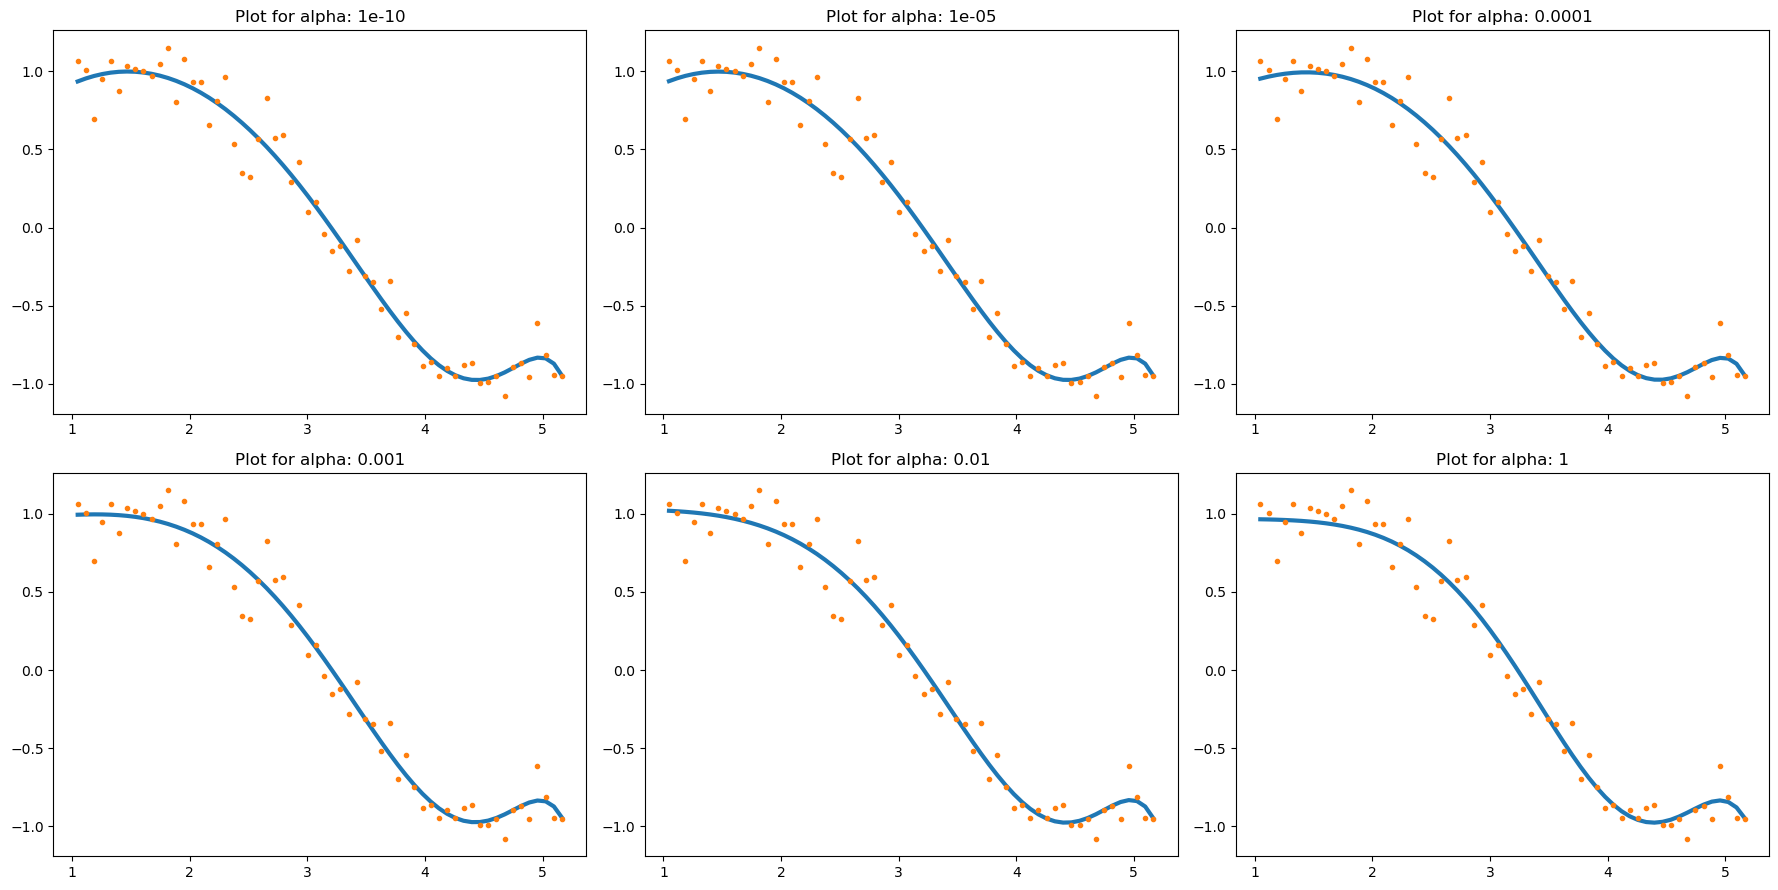

In [15]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [16]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-05,0.96,0.26,1,-0.34,-0.0057,0.0017,-5.8e-05,-5.7e-05,-5.9e-06,1.4e-06,7.6e-07,2e-07,3.9e-08,5.3e-09,1.8e-10,-1.9e-10,-9.2e-11
alpha_0.0001,0.96,0.55,0.5,-0.046,-0.065,0.0022,0.00048,1e-05,-2.1e-06,9.5e-07,5.8e-07,1.7e-07,3.4e-08,4.8e-09,1.9e-10,-1.7e-10,-8.5e-11
alpha_0.001,0.97,0.95,0,0.07,-0.011,-0.019,0.00081,0.00028,2.8e-05,2.5e-06,3.1e-07,6.8e-08,1.5e-08,2.1e-09,7.1e-12,-1.3e-10,-6.3e-11
alpha_0.01,0.99,1,0,0,0,-0.0042,-0.0038,0.00026,8.5e-05,8.7e-06,6.7e-07,2.5e-08,-4e-09,-1.5e-09,-4.3e-10,-1.3e-10,-4.2e-11
alpha_1,1,0.97,-0,-0,-0,-0,-0,-0.002,4.5e-05,9.8e-05,3.3e-06,-5.2e-07,-1.6e-07,-2.6e-08,-2.7e-09,3.8e-11,1.1e-10
alpha_5,1.2,0.91,-0,-0,-0,-0,-0,-0.00016,-0.00061,7.3e-05,2.2e-05,3.6e-07,-2.1e-07,-5e-08,-6.6e-09,-2.6e-10,1.8e-10
alpha_10,1.3,0.89,-0,-0,-0,-0,-0,-0,-0.00053,-0,3.2e-05,1e-06,-2.2e-07,-6.3e-08,-8.8e-09,-3.9e-10,2.4e-10


In [17]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     1
alpha_0.01      3
alpha_1         5
alpha_5         5
alpha_10        7
dtype: int64

正则化项是在机器学习中用于控制模型复杂度的一种技术。

它在模型的损失函数中引入一个额外的项，这个项的目的是限制模型参数的大小，从而防止过拟合。

在线性回归中，损失函数通常是最小化实际观测值与模型预测值之间的差异。正则化项添加到损失函数中，可以采用L1正则化（Lasso）或L2正则化（Ridge）。

L1正则化（Lasso）：

L1正则化项是模型参数的绝对值之和乘以一个正则化参数。其数学形式为：$$\lambda \sum_{i=1}^{n} |w_i|$$
这个正则化项促使模型中的某些参数趋向于零，因此具有稀疏性，可以用于特征选择。
L2正则化（Ridge）：

L2正则化项是模型参数的平方和乘以一个正则化参数。其数学形式为：$$\lambda \sum_{i=1}^{n} w_i^2 $$
这个正则化项对参数进行平滑，防止参数过大，有助于处理共线性问题。
正则化项的引入可以控制模型的复杂度，防止模型在训练数据上过拟合。正则化参数 \lambdaλ 是一个调整项，用于平衡模型的拟合和正则化项的影响，其值越大，正则化的影响越强。选择合适的正则化参数对于获得泛化性能好的模型非常重要。




